<a href="https://colab.research.google.com/github/pinkyellowzebra/LLM/blob/main/Gen_AI_Best_Practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1.1 벡터

In [ ]:
import numpy as np
import gensim.downloader as api
glove_vectors = api.load("glove-twitter-25")
word1 = "king"
word2 = "queen"

king = glove_vectors[word1]
queen = glove_vectors[word2]

print('king:\n', king)
print('queen:\n', queen)

[==================================================] 100.0% 104.8/104.8MB downloaded
king:
 [-0.74501  -0.11992   0.37329   0.36847  -0.4472   -0.2288    0.70118
  0.82872   0.39486  -0.58347   0.41488   0.37074  -3.6906   -0.20101
  0.11472  -0.34661   0.36208   0.095679 -0.01765   0.68498  -0.049013
  0.54049  -0.21005  -0.65397   0.64556 ]
queen:
 [-1.1266   -0.52064   0.45565   0.21079  -0.05081  -0.65158   1.1395
  0.69897  -0.20612  -0.71803  -0.02811   0.10977  -3.3089   -0.49299
 -0.51375   0.10363  -0.11764  -0.084972  0.02558   0.6859   -0.29196
  0.4594   -0.39955  -0.40371   0.31828 ]


In [ ]:
np.linalg.norm(king, ord=1)
np.linalg.norm(king, ord=2)

4.3206835

In [ ]:
np.dot(king, queen)/(np.linalg.norm(king)*np.linalg.norm(queen))

0.92024213

In [ ]:
similarity = glove_vectors.similarity(word1, word2)
print(f"Word vectors for '{word1}': {king}")
print(f"Word vectors for '{word2}': {queen}")
print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")

Word vectors for 'king': [-0.74501  -0.11992   0.37329   0.36847  -0.4472   -0.2288    0.70118
  0.82872   0.39486  -0.58347   0.41488   0.37074  -3.6906   -0.20101
  0.11472  -0.34661   0.36208   0.095679 -0.01765   0.68498  -0.049013
  0.54049  -0.21005  -0.65397   0.64556 ]
Word vectors for 'queen': [-1.1266   -0.52064   0.45565   0.21079  -0.05081  -0.65158   1.1395
  0.69897  -0.20612  -0.71803  -0.02811   0.10977  -3.3089   -0.49299
 -0.51375   0.10363  -0.11764  -0.084972  0.02558   0.6859   -0.29196
  0.4594   -0.39955  -0.40371   0.31828 ]
Cosine similarity between 'king' and 'queen': 0.920242190361023


# 2.2.5 BERT 토큰화

In [ ]:
from transformers import AutoModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained("bert-base-uncased")
# 어휘의 크기
print(tokenizer.vocab_size)
print(tokenizer.vocab)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

30522
{'acid': 5648, 'irony': 19728, '1815': 10679, 'melodies': 16106, '##∧': 30129, 'confesses': 22826, '##ologist': 8662, 'suspect': 8343, 'vicious': 13925, '##mb': 14905, 'remake': 12661, 'starring': 4626, 'cheshire': 13789, 'recent': 3522, 'steer': 20634, 'shapes': 10466, 'nottingham': 11331, 'gaps': 16680, '##imating': 22835, '##eson': 21421, 'flaming': 19091, 'え': 1649, 'hari': 21291, 'coward': 16592, 'defiance': 19674, '##group': 17058, 'tomb': 8136, '1605': 28202, 'albanian': 9408, 'inhibitor': 24054, 'tna': 20108, 'alfonso': 13591, '[unused834]': 839, 'fortune': 7280, 'gaunt': 27534, 'leap': 11679, 'haitian': 21404, 'rely': 11160, '##ctus': 22675, 'clarity': 15563, '##¢': 29645, 'resigned': 5295, 'alsace': 24922, '##brand': 23544, 'limousine': 28012, '##dled': 20043, 'hannover': 29209, 'az': 17207, '##iche': 17322, '##kney': 26993, '##vale': 17479, 'installed': 5361, 'facades': 28708, 'paranormal': 20725, 'simpler': 16325, 'traveled': 6158, 'mcgrath': 23220, '##ptic': 20746, '

In [ ]:
text = "GenAI is awesome"
encoded_input = tokenizer(text, return_tensors='pt')
print(encoded_input)

{'input_ids': tensor([[  101,  8991,  4886,  2003, 12476,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


In [ ]:
print({x : tokenizer.encode(x, add_special_tokens=False) for x in ['[CLS]']+ text.split()+ ['[SEP]']})

{'[CLS]': [101], 'GenAI': [8991, 4886], 'is': [2003], 'awesome': [12476], '[SEP]': [102]}


In [ ]:
print({x : tokenizer.encode(x, add_special_tokens=False) for x in ['[CLS]', '[SEP]', '[MASK]', '[EOS]']})

{'[CLS]': [101], '[SEP]': [102], '[MASK]': [103], '[EOS]': [1031, 1041, 2891, 1033]}


In [ ]:
token_id = encoded_input['input_ids'].tolist()
for sentence_token_id in token_id:
  token_dict={tokenizer.convert_ids_to_tokens(id, skip_special_tokens=False):id for id in sentence_token_id}
print(token_dict)

{'[CLS]': 101, 'gen': 8991, '##ai': 4886, 'is': 2003, 'awesome': 12476, '[SEP]': 102}


In [ ]:
text = "Gen AI is awsesome"
encoded_input = tokenizer(text, return_tensors='pt')
print({x : tokenizer.encode(x, add_special_tokens=False) for x in ['[CLS]']+ text.split()+ ['[SEP]']})
print(tokenizer.convert_ids_to_tokens(100, skip_special_tokens=False))

{'[CLS]': [101], 'Gen': [8991], 'AI': [9932], 'is': [2003], 'awsesome': [22091, 8583, 8462], '[SEP]': [102]}
[UNK]


In [ ]:
text = "GenAI is awesome "
print({x : tokenizer.encode(x, add_special_tokens=False) for x in ['[CLS]']+ text.split()+ ['[SEP]']})
print(tokenizer.convert_ids_to_tokens(100, skip_special_tokens=False))

{'[CLS]': [101], 'GenAI': [8991, 4886], 'is': [2003], 'awesome': [12476], '[SEP]': [102]}
[UNK]


# 2.2.6 Modern BERT

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
model_id = "answerdotai/ModernBERT-base"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForMaskedLM.from_pretrained(model_id)

text = "The capital of France is [MASK]."
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)

# 마스크에 대한 예측을 얻으려면:
masked_index = inputs["input_ids"][0].tolist().index(tokenizer.mask_token_id)
predicted_token_id = outputs.logits[0, masked_index].argmax(axis=-1)
predicted_token = tokenizer.decode(predicted_token_id)
print("Predicted token:", predicted_token)

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

Predicted token:  Paris


# 2.3.3 Ollama

## Installing Dependencies
---

1. `pciutils` is required by Ollama to detect the GPU type.
2. Installation of Ollama in the runtime instance will be taken care by `curl -fsSL https://ollama.com/install.sh | sh`

In [ ]:
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
29 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

## Running Ollama
---

In order to use Ollama it needs to run as a service in background parallel to your scripts. Becasue Jupyter Notebooks is built to run code blocks in sequence this make it difficult to run two blocks at the same time. As a workaround we will create a service using subprocess in Python so it doesn't block any cell from running.

Service can be started by command `ollama serve`.

`time.sleep(5)` adds some delay to get the Ollama service up before downloading the model.

In [ ]:
import threading
import subprocess
import time

def run_ollama_serve():
  subprocess.Popen(["ollama", "serve"])

thread = threading.Thread(target=run_ollama_serve)
thread.start()
time.sleep(5)

## Pulling Model
---

Download the LLM model using `ollama pull llama3.2`.

For other models check https://ollama.com/library|

In [ ]:
!ollama pull llama3.2

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest 
pulling dde5aa3fc5ff... 100% ▕▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕▏ 6.0 KB                         
pulling 56bb8bd477a5... 100% ▕▏   96 B                         
pulling 34bb5ab01051... 100% ▕▏  561 B                         
verifying sha256 digest 
writing manifest 
success 


## And that's it!
---

With this you should be able to freely play around with the models in your scripts. Following is an example using `langchain-ollama` to answer a simple prompt.

If you have a use-case that can help out others feel free to add your notebook to [Collama](https://github.com/5aharsh/collama/fork)

In [ ]:
!pip install langchain-ollama

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM
from IPython.display import Markdown

template = """Question: {question}

Answer: Let's think step by step."""

prompt = ChatPromptTemplate.from_template(template)

model = OllamaLLM(model="llama3.2")

chain = prompt | model

display(Markdown(chain.invoke({"question": "What's Mixture of Experts(MoE) in AI?"})))

Mixture of Experts (MoE) is a type of neural network architecture that has gained significant attention in recent years, particularly in the field of natural language processing and computer vision.

To understand MoE, let's break it down into its core components:

1. **Diversity**: In traditional neural networks, all models are expected to be similar and share a common set of weights. In contrast, MoE aims to create a diverse ensemble of experts that can provide a more comprehensive representation of the data.
2. **Expert Models**: These are individual neural network models that specialize in specific tasks or domains within the larger problem. For example, an expert model might be specialized in object detection, while another is focused on segmentation.
3. **Mixture Weighting**: The key idea behind MoE is to combine the predictions of these expert models using a weighted mixture. This allows each expert model to contribute its strengths and weaknesses to the overall output.

The benefits of MoE include:

* Improved robustness to overfitting
* Enhanced ability to capture diverse patterns in the data
* Reduced risk of catastrophic forgetting

Some common applications of MoE include:

* Natural Language Processing (NLP): text classification, sentiment analysis, machine translation
* Computer Vision: object detection, segmentation, image classification

The limitations and challenges of MoE include:

* Designing effective expert models that can be combined meaningfully
* Choosing optimal mixture weights to balance the contributions of each expert model

Overall, MoE has shown great promise as a flexible and powerful architecture for tackling complex problems in AI.

# 3.1.1 원-핫 인코더

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

data = pd.DataFrame({'word':['python','pyspark','genai', 'pyspark', 'python','pyspark']})

# 코퍼스 빈도
print('Vocabulary frequency:')
print(dict(Counter(data['word'])))

# 코퍼스 순서
print('\nVocabulary order:')
print(sorted(set(data['word'])))

# 데이터를 원-핫 인코딩하기
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(data[['word']])

# 코퍼스의 순서를 기준으로 인코딩
print('\nEncoded representation:')
print(onehot_encoded)

Vocabulary frequency:
{'python': 2, 'pyspark': 3, 'genai': 1}

Vocabulary order:
['genai', 'pyspark', 'python']

Encoded representation:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
'Gen AI is awesome',
'Gen AI is fun',
'Gen AI is hot'
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
print('Vocabulary:')
print(vectorizer.get_feature_names_out())
print('\nEmbedded representation:')
print(X.toarray())

Vocabulary:
['ai' 'awesome' 'fun' 'gen' 'hot' 'is']

Embedded representation:
[[1 1 0 1 0 1]
 [1 0 1 1 0 1]
 [1 0 0 1 1 1]]


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["Gen AI is awesome", "Gen AI is fun", "Gen AI is hot"]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print('어휘:')
print(vectorizer.get_feature_names_out())
corpus_flatted = [item for sub_list in [s.split(' ') for s in corpus] for item in sub_list]
print('\n어휘 빈도:')
print(dict(Counter(corpus_flatted)))
print('\n임베디드 표현:')
print(X.toarray())

어휘:
['ai' 'awesome' 'fun' 'gen' 'hot' 'is']

어휘 빈도:
{'Gen': 3, 'AI': 3, 'is': 3, 'awesome': 1, 'fun': 1, 'hot': 1}

임베디드 표현:
[[0.41285857 0.69903033 0.         0.41285857 0.         0.41285857]
 [0.41285857 0.         0.69903033 0.41285857 0.         0.41285857]
 [0.41285857 0.         0.         0.41285857 0.69903033 0.41285857]]


In [ ]:
# 어휘
tf_idf = pd.DataFrame({'term':vectorizer.get_feature_names_out()}).set_index('term')

# |D|
tf_idf['|D|'] = [len(corpus)]*len(vectorizer.get_feature_names_out())

# TF
tf_idf['TF'] = [1, 1, 0, 1, 0, 1]

# DF
tf_idf['DF'] = [3, 1, 1, 3, 1, 3]

# IDF
tf_idf['IDF'] = np.log((tf_idf['|D|']+1)/(tf_idf['DF']+1))+1

# TF-IDF
tf_idf['TF-IDF'] = tf_idf['TF']*tf_idf['IDF']

# 정규화
tf_idf['TF-IDF(l2)'] = tf_idf['TF-IDF']/np.linalg.norm(tf_idf['TF-IDF'])
print(tf_idf)

         |D|  TF  DF       IDF    TF-IDF  TF-IDF(l2)
term                                                
ai         3   1   3  1.000000  1.000000    0.412859
awesome    3   1   1  1.693147  1.693147    0.699030
fun        3   0   1  1.693147  0.000000    0.000000
gen        3   1   3  1.000000  1.000000    0.412859
hot        3   0   1  1.693147  0.000000    0.000000
is         3   1   3  1.000000  1.000000    0.412859


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
corpus = ["Gen AI is awesome", "Gen AI is fun", "Gen AI is hot"]

# 파이프라인
pipe=Pipeline([('count', CountVectorizer(lowercase=True)), ('tfid',TfidfTransformer())]).fit(corpus)
print(pipe)

# TF
print(pipe['count'].transform(corpus).toarray())

# IDF
print(pipe['tfid'].idf_)
Pipeline(steps=[('count', CountVectorizer()), ('tfid', TfidfTransformer())])


Pipeline(steps=[('count', CountVectorizer()), ('tfid', TfidfTransformer())])
[[1 1 0 1 0 1]
 [1 0 1 1 0 1]
 [1 0 0 1 1 1]]
[1.         1.69314718 1.69314718 1.         1.69314718 1.        ]


Pipeline(steps=[('count', CountVectorizer()), ('tfid', TfidfTransformer())])

3.2.1 Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize

corpus = [ 'Gen AI is awesome', 'Gen AI is fun', 'Gen AI is hot']

def tokenize_gensim(corpus):
  tokens=[]
  for s in corpus:
    temp=gensim.utils.tokenize(s, lowercase=True, deacc=False, errors='strict', to_lower=False, lower=False)
    tokens.append(list(temp))
  return tokens

tokens = tokenize_gensim(corpus)

model1 = gensim.models.Word2Vec(tokens, sg=0, vector_size=10, window=5, min_count=1, epochs=50)
print(model1.wv.key_to_index)
print(model1.wv.get_normed_vectors())
print("Cosine similaritybetween 'gen' " + "and 'ai' - Word2Vec(CBOW):", model1.wv.similarity('gen', 'ai'))

model2 = gensim.models.Word2Vec(tokens, sg=1, vector_size=10, window=5, min_count=1, epochs=50)
print(model2.wv.key_to_index)
print(model2.wv.get_normed_vectors())
print("Cosine similaritybetween 'gen' " + "and 'ai' - Word2Vec(SG):", model2.wv.similarity('gen', 'ai'))

{'ai': 0, 'is': 1, 'gen': 2, 'hot': 3, 'fun': 4, 'awesome': 5}
[[-0.02665432  0.01174606  0.2531679   0.44694838 -0.4615409  -0.3530806
   0.32041332  0.44520146 -0.24879245 -0.18666053]
 [ 0.41627365 -0.08642942 -0.2556907   0.36958042 -0.27397302 -0.10243395
   0.16221763  0.05595349 -0.4672705  -0.53285813]
 [ 0.43422803  0.30104548  0.4012914   0.04533421  0.3770997  -0.20221284
  -0.0561582   0.34249926 -0.44667405 -0.23378699]
 [-0.41098067 -0.05088534  0.5218584  -0.40045303 -0.12768732 -0.10601949
   0.44194022 -0.32449666  0.00247097 -0.2600907 ]
 [-0.44078055  0.22983079 -0.4022442  -0.20150864 -0.00172111 -0.0136166
  -0.35166094  0.44139358  0.22859998  0.42372653]
 [-0.42753762  0.23561442 -0.21681462  0.04321203  0.44539306 -0.23385239
   0.23675178 -0.35568893 -0.18596812  0.49255413]]
Cosine similaritybetween 'gen' and 'ai' - Word2Vec(CBOW): 0.30042392
{'ai': 0, 'is': 1, 'gen': 2, 'hot': 3, 'fun': 4, 'awesome': 5}
[[-0.02665432  0.01174606  0.2531679   0.44694838 -0.461

3.2.2 GloVE

In [ ]:
import gensim.downloader as api
# 사전 훈련된 GloVE 모델 다운로드
glove_vectors = api.load("glove-wiki-gigaword-50")
# 워드 벡터 가져오기(임베딩)
word1 = "king"
word2 = "queen"
vector1 = glove_vectors[word1]
vector2 = glove_vectors[word2]

similarity = glove_vectors.similarity(word1, word2)
print(f"Word vectors for '{word1}': {vector1}")
print(f"Word vectors for '{word2}': {vector2}")
print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")

[==================================================] 100.0% 66.0/66.0MB downloaded
Word vectors for 'king': [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
Word vectors for 'queen': [ 0.37854    1.8233    -1.2648    -0.1043     0.35829    0.60029
 -0.17538    0.83767   -0.056798  -0.75795    0.22681    0.98587
  0.60587   -0.31419    0.28877    0.56013   -0.77456    0.071421
 -0.5741     0.21342    0.57674    0.3868    -0.12574    0.28012
  0.28135   -1.8053    -1.0421    -0.19255   -0.55375   -0.054526
  1.5574     0.39296   -0.2475     0.342

3.2.3 Fast Text

In [ ]:
from gensim.models import FastText
import gensim
from gensim.models import Word2Vec


corpus=[ 'Gen AI is awesome', 'Gen AI is fun', 'Gen AI is hot']

def tokenize_gensim(corpus):
  tokens=[]
  for s in corpus:
    temp=gensim.utils.tokenize(s, lowercase=True, deacc=False, errors='strict', to_lower=False, lower=False)
    tokens.append(list(temp))
  return tokens

tokens = tokenize_gensim(corpus)

model = FastText(tokens, vector_size=10, window=5, min_count=1, workers=4, epochs=50)
print(model.wv.key_to_index)
print(model.wv.get_normed_vectors())

print("Cosine similarity between 'gen' " +"and 'ai' - Word2Vec:",model.wv.similarity('gen', 'ai'))

{'ai': 0, 'is': 1, 'gen': 2, 'hot': 3, 'fun': 4, 'awesome': 5}
[[ 0.43384653 -0.34694687  0.03298135 -0.08994269 -0.5254966   0.140813
   0.13491459  0.08483591 -0.35344815 -0.48572412]
 [ 0.1882632   0.03251388 -0.47676432  0.19201422 -0.09984452  0.03496066
   0.33560154  0.14799657 -0.36009228 -0.6511046 ]
 [ 0.18040803  0.51484305  0.40692276  0.05967464 -0.05987296 -0.10833316
   0.37995577  0.59927344  0.01497797  0.11917277]
 [-0.5694013   0.23560704  0.0265804  -0.41392225 -0.00285366 -0.3076269
   0.2076883  -0.425648    0.29903153  0.19965051]
 [-0.23892017  0.10745972 -0.03764514 -0.23519123  0.32090047  0.21609971
  -0.29565036 -0.03042671  0.7525695   0.26507646]
 [-0.31881964 -0.06544963 -0.44274488  0.15485793  0.39120612 -0.05415314
   0.15772066 -0.05987714 -0.6986104   0.03967094]]
Cosine similarity between 'gen' and 'ai' - Word2Vec: -0.037169438


# 3.3.1 BERT

In [ ]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")
text = "Gen AI is awesome"
encoded_input = tokenizer(text, return_tensors='pt')
embeddings = model(**encoded_input).last_hidden_state
print(encoded_input)
print({x : tokenizer.encode(x, add_special_tokens=False) for x in ['[CLS]']+text.split()+ ['[SEP]', '[EOS]']})
print(embeddings.shape)
print(embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

{'input_ids': tensor([[  101,  8991,  9932,  2003, 12476,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
{'[CLS]': [101], 'Gen': [8991], 'AI': [9932], 'is': [2003], 'awesome': [12476], '[SEP]': [102], '[EOS]': [1031, 1041, 2891, 1033]}
torch.Size([1, 6, 768])
tensor([[[-0.1129, -0.1477, -0.0056,  ..., -0.1335,  0.2605,  0.2113],
         [-0.6841, -1.1196,  0.3349,  ..., -0.5958,  0.1657,  0.6988],
         [-0.5385, -0.2649,  0.2639,  ..., -0.1544,  0.2532, -0.1363],
         [-0.1794, -0.6086,  0.1292,  ..., -0.1620,  0.1721,  0.4356],
         [-0.0187, -0.7320, -0.3420,  ...,  0.4028,  0.1425, -0.2014],
         [ 0.5493, -0.1029, -0.1571,  ...,  0.3503, -0.7601, -0.1398]]],
       grad_fn=<NativeLayerNormBackward0>)


# 3.3.2 gte-large-en-v1.5

In [ ]:
import torch.nn.functional as F
from transformers import AutoModel, AutoTokenizer
input_texts = [
'Gen AI is awesome',
'Gen AI is fun',
'Gen AI is hot'
]
model_path = 'Alibaba-NLP/gte-large-en-v1.5'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path, trust_remote_code=True)
# 입력 텍스트를 토큰화
batch_dict = tokenizer(input_texts, max_length=8192, padding=True, \
truncation=True, return_tensors='pt')
print(batch_dict)
outputs = model(**batch_dict)
embeddings = outputs.last_hidden_state[:, 0]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

configuration.py:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py:   0%|          | 0.00/59.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

{'input_ids': tensor([[  101,  8991,  9932,  2003, 12476,   102],
        [  101,  8991,  9932,  2003,  4569,   102],
        [  101,  8991,  9932,  2003,  2980,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1]])}


In [ ]:
embeddings = F.normalize(embeddings, p=2, dim=1)
scores = (embeddings[:1] @ embeddings[1:].T) * 100
print(embeddings)
print(scores.tolist())

tensor([[ 0.0079,  0.0008, -0.0001,  ...,  0.0418, -0.0138, -0.0236],
        [ 0.0079,  0.0218, -0.0171,  ...,  0.0412, -0.0230, -0.0237],
        [ 0.0073, -0.0106, -0.0194,  ...,  0.0711, -0.0204, -0.0036]],
       grad_fn=<DivBackward0>)
[[92.85282135009766, 92.81655883789062]]


3.3.3 bge-base-en-v1.5

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
# 문장 임베딩을 원하는 문장들
sentences = [
'Gen AI is awesome',
'Gen AI is fun',
'Gen AI is hot'
]
# HuggingFace Hub에서 모델 로드
tokenizer = AutoTokenizer.from_pretrained('BAAI/bge-large-zh-v1.5')
model = AutoModel.from_pretrained('BAAI/bge-large-zh-v1.5')
model.eval()
# 문장 토큰화

encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
print(encoded_input)


with torch.no_grad():
  model_output = model(**encoded_input)
  # 풀링 수행. 이 경우, cls 풀링
  sentence_embeddings = model_output[0][:, 0]
# 임베딩 정규화
sentence_embeddings = torch.nn.functional.normalize(sentence_embeddings, p=2, dim=1)
print("Sentence embeddings:", sentence_embeddings)

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/439k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'input_ids': tensor([[  101, 10234,  8171,  8578,  8310,   143, 11722,  9974,  8505,   102],
        [  101, 10234,  8171,  8578,  8310,  9575,   102,     0,     0,     0],
        [  101, 10234,  8171,  8578,  8310,  9286,   102,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])}


model.safetensors:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

Sentence embeddings: tensor([[ 0.0700,  0.0119,  0.0049,  ...,  0.0428, -0.0475,  0.0242],
        [ 0.0800, -0.0065, -0.0519,  ...,  0.0057, -0.0770,  0.0119],
        [ 0.0740, -0.0185, -0.0369,  ...,  0.0083, -0.0026,  0.0016]])


# 4.3 고급 프롬프트 엔지니어링


In [ ]:
!pip install langchain
!pip install langchain langchain-community

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh
!ollama run mistral

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
Error: could not connect to ollama app, is it running?


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM
template = """role: 당신은 {role}입니다.
task: {task}
answer:
"""
prompt = ChatPromptTemplate.from_template(template)
model = OllamaLLM(model="llama3.2")
chain = prompt | model
response = chain.invoke({'role': '데이터 과학자', \
"task": "초보자에게 머신러닝 모델을 구축하는방법을 설명해줘"})
print(response)

안녕하세요!データ 과학자로서, 머신러닝 모델을 구축하는 방법을 초보자에게 알려드릴게요.

**머신러닝 modeling의 grund principle**

머신러닝은 computationally intensive한 알고리즘으로, 데이터를 analyzed와 pattern을 recognition해 내는 데 사용됩니다. 모델은 training data에 기반하여 학습된 knowledge를 바탕으로 new data에 대한 예측을 합니다.

** steps to create a machine learning model**

1. **Problem definition**: 문제를 정의하고, 목표를 설정합니다. 예를 들어, spam 메일을识别하는 모델을 구축하도록 가정해 보겠습니다.
2. **Data collection**: training data와 test data를 수집합니다. training data는 모델을 학습시키기 위한 data로, test data는 모델의 성능을 평가하기 위한 data입니다.
3. **Feature engineering**: feature extraction을 통해 데이터를 준비합니다. 예를 들어, spam 메일과 일반 메일에 대한 특징을 분리해 낼 수 있습니다.
4. **Model selection**: suitable algorithm을 선택합니다. spam 메일 분류에 적합한 모델은 logistic regression, decision tree, random forest 등이 있습니다.
5. **Hyperparameter tuning**: model의 hyperparameter를 fine-tune합니다. 예를 들어, weights와 bias가 models의 성능에 큰 영향을 미치므로 tuning을 해서 optimal parameter를 found할 수 있습니다.
6. **Model training**: model을 training data로 train시킵니다. 이때 model이 feature를 learning하여 patterns를 rec

In [ ]:
template = """role: 당신은 {role} 입니다.
task: {task}
answer:
"""
prompt = ChatPromptTemplate.from_template(template)
model = OllamaLLM(model='llama3.2')
chain = prompt | model
response = chain.invoke({'role': '작가', \
"task": "저는 GenAI 최선의 실천 방법에 관한 책을 쓸 계획입니다. 책의 목차를 작성하는 데 도와주세요."})
print(response)


저는 आपक에게_genAI최선의 실천 방법_에 관한 책을 쓰기 위한 목차를 제안해 드릴게요.

**목 차**

1. **GenAI의 개념과 역사**
 * GenAI의 정의와 주요Concepts
 * GenAI의 발전과 현황
2. **GenAI의 types 및 용도**
 * Natural Language Processing (NLP)
 * Computer Vision
 * Reinforcement Learning
 * Generative Adversarial Networks (GANs)
3. **GenAI 최선의 실천 방법 - 기초**
 * Data preprocessing and cleaning
 * Model selection and hyperparameter tuning
 * Model evaluation and validation
4. **GenAI 최선의 실천 방법 - NLP**
 * Text preprocessing and tokenization
 * Sentiment analysis and topic modeling
 * Chatbot development and conversation management
5. **GenAI 최선의 실천 방법 - Computer Vision**
 * Image classification and object detection
 * Object tracking and segmentation
 * Facial recognition and emotion analysis
6. **GenAI 최선의 실천 방법 - Reinforcement Learning**
 * Markov decision processes (MDPs)
 * Policy gradients and value functions
 * Deep reinforcement learning
7. **GenAI 최선의 실천 방법 - GANs**
 * Generative adversarial networks (GANs) basics
 * Unsupervised and supe

In [ ]:
from langchain_ollama.llms import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate

template = """당신은 {role} 입니다.
task: {task}
instruction: {instruction}
answer: 한 단계씩 생각해봅시다.
"""
prompt = ChatPromptTemplate.from_template(template)
model = OllamaLLM(model='llama3.2')

chain = prompt | model
response = chain.invoke({'role': 'AI 엔지니어', \
'task': "단어 임베딩의 개념을 100단어로 설명해줘",\
'instruction': "고등학생이 이해할 수 있는 간단한 언어로"})
print(response)

단어 임베딩은 어떻게 만들고 사용하는지 알려드리겠습니다.

1.  **안전한 데이터**를 이용하여 word2vec 또는 glove와 같은 어뎀지니징 기술을 사용하여 단어가 가질 수 있는 특성을 계산합니다.
2.  한 단어의 가치에 대한 그룹화에 대한 정보를 계산하고, 다른 단어와 비교하면 유사성이나 차이가 있는지 파악할 수 있습니다.
3.  임베딩은 단어가 어떤 의미나 의미 관련된 개념을 보는 것과 동일합니다.

이러한 기술들은 많은 자연어 프로세sing tasks에 사용됩니다.


In [ ]:
from langchain_ollama.llms import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate

template = """당신은 {role} 입니다.
task: {task}
question: {question}
answer: 한 단계씩 생각해봅시다.
"""
prompt = ChatPromptTemplate.from_template(template)
model = OllamaLLM(model='llama3.2')

chain = prompt | model
response = chain.invoke({'role': '수학 문제를 푸는 학생', \
'task': "이 수학 문제를 단계별로 풀어보세요: 기차가 1.5시간 동안 60마일을 여행합니다.",\
'question': "기차의 평균 속도는 얼마인가요?"})
print(response)

기차의 평균속도를 구하기 위해서는 평균속도가란 기차가 여행한 거리를 시간에 따라 가는 속力を 의미한다. 

1단계: 기차가 1.5시간 동안 60마일을 여행한다. 
   이 60 마일은 기차가 가는 거리이다.
   
2단계: 60 마일은 시간과 속도를掛해도 되고, 시간이 passage하고 속도가 일정한 경우에만 도출할 수 있는 속력을 의미한다.
   60마일 = 속도 * 1.5시간

3단계: 이속도는 기차가 가는 속성을 의미한다. 
   60 마일 = 속도 * 1.5시간
   => 속도 = 60 마일 / 1.5시간
   => 속도 = 40마일/시간
   
이제 이 단계를 다한 after .


In [ ]:
from langchain_ollama.llms import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate

template = """you are a {role}
task: {task}
examples: {example}
input: {input}
decision:"""

prompt = ChatPromptTemplate.from_template(template)
model = OllamaLLM(model='llama3.2')


chain = prompt | model
response = chain.invoke({'role': '은행원', \
                         'task': "대출 신청을 승인할지 거절할지 결정하는 데 도움을 주세요.",\
'example': {'input': {'fico':800, 'income':100000,\
                      'loan_amount': 10000},\
'decision': "accept"}, \
'input': {'fico':820, 'income':100000, \
          'loan_amount': 1000}})
print(response)

나의 도움이 필요하신가요?

대출 신청을 승인할지 거절할지 결정하는 데 ayuda를 드리겠습니다.

제시된 예시와 같은 경우, FICO 점수는 820,รายได는 100000, vayyyy가 1000입니다.

이러한 정보를 고려해 본后, 대출를 승인하는게 적합하다는 결과가 나옵니다.


In [ ]:
template = """you are a {role}
task: {task}
examples: {example}
input: {input}
decision:
reason:
"""
prompt = ChatPromptTemplate.from_template(template)
model = OllamaLLM(model='llama3.2')
chain = prompt | model
response = chain.invoke({'role': '은행원', \
'task': "대출 신청을 승인하거나 거절할 결정을 내리고 그 이유를 제시해주세요.",'example': {'input': {'fico':800, 'income':100000, 'loan_amount': 10000}, 'decision': "accept"},'input': {'fico':820, 'income':100000, 'loan_amount': 1000}
})
print(response)

{'input': {'fico': 820, 'income': 100000, 'loan_amount': 1000}, 
 'decision': 'accept',
 'reason': 'customer\'s high FICO score (820) and stable income (100000) indicate a low credit risk. The loan amount is also relatively small (1000), which suggests that the customer can manage their debt burden. Therefore, we are approving the loan application.'}


In [ ]:
template = """당신은 {role} 입니다.
task: {task}
instruction: {instruction}
input: {input}
decision:
reason:
"""
prompt = ChatPromptTemplate.from_template(template)
model = OllamaLLM(model='llama3.2')
chain = prompt | model
response = chain.invoke({'role': 'banker', \
'task': "대출 신청을 승인하거나 거절할 결정을 내리고 그 이유를 제시해주세요.",\
'instruction': {'step 1': "FICO 점수 확인",\
'step 2': "소득 확인",\
'step 3': "대출 금액 확인",\
'step 4': "결정 내리기",\
'step 5': "이유 설명하기"
},
'input': {'fico':320, 'income':10000, \
          'loan_amount': 100000}
})
print(response)

저는ธนาคาร직으로서의 지식과 역량을 사용하여 대출 신청을 승인하거나 거절할 결정을 내리고 이유를 제시합니다.

**결정:** 대출 신청은 승인됩니다.

**이유:**

1. **FICO 점수 확인**: FICO 점수의 경우, 320점 이상은 적격으로 간주되며, 대출 금액에 따라 점수를 조절할 수 있습니다.
2. **소득 확인**: 소득은 대출 가능한金额를 결정하는 데 중요한 역할을 합니다. 이 경우, 소득이 10,000원 이상으로 높은 수준이므로 적합합니다.
3. **대출 금액 확인**: 대출 금액인 100,000원은 대출가능금액을 초과하며, 적절한 금액입니다.
4. **결정 내리기**: Based on 위의 step에 따라, 대출 신청은 승인됩니다.
5. **이유 설명하기**: 대출신청은 승인되었습니다because FICO 점수, 소득 및 대출금액이 적절하며, 대출가을자성이 없으므로 대출금額를 조정하여 지출가을자가 가능한지 확인하는것이 필요합니다.

다시말해서, 대출 신청은 승인됩니다.


# 5.2 Naive RAG

naive chunking

In [ ]:
def fixed_length_chucking(text, chunk_size=200):
  words = text.split()
  return [" ".join(words[i:i+chunk_size]) for i in range(0, len(words), chunk_size)]

document = "이것은 고정 길이 청킹을 보여주기 위해 여러 문장이 포함된 샘플 문서입니다."
chunks=fixed_length_chucking(document,chunk_size=10)
for idx, chunk in enumerate(chunks):
  print(f"Chunk {idx+1}:{chunk}")

Chunk 1:이것은 고정 길이 청킹을 보여주기 위해 여러 문장이 포함된 샘플
Chunk 2:문서입니다.


In [ ]:
def sliding_window_chunking(text, chunk_size=100, overlap_size=20):
  words = text.split()
  chunks = []
  for i in range(0, len(words), chunk_size - overlap_size):
    chunk = " ".join(words[i:i + chunk_size])
    chunks.append(chunk)
  return chunks
# 예시
document = "이것은 슬라이딩 윈도우 청킹을 보여주기 위해 여러 문장이 포함된 문서입니다."
chunks = sliding_window_chunking(document, chunk_size=10, overlap_size=3)
for idx, chunk in enumerate(chunks):
  print(f"Chunk {idx + 1}: {chunk}")

Chunk 1: 이것은 슬라이딩 윈도우 청킹을 보여주기 위해 여러 문장이 포함된 문서입니다.
Chunk 2: 문장이 포함된 문서입니다.


In [ ]:
import nltk
nltk.download('punkt_tab')


def semantic_chunking(text, sentence_len=50):
  sentences = sent_tokenize(text)
  chunks = []
  chunk = ""

  for sentence in sentences:
    if len(chunk.split()) + len(sentence.split()) <= sentence_len:
      chunk += " " + sentence
    else:
      chunks.append(chunk.strip())
      chunk = sentence
  if chunk:
      chunks.append(chunk.strip())
  return chunks
# 예시
document = ("이것은 샘플 문서입니다. 의미론적  경계를 기준으로 분할됩니다." "각 청크는 더 나은 검색을 위해 일관된 의미를 갖습니다.")
chunks = semantic_chunking(document, 10)
for idx, chunk in enumerate(chunks):
  print(f"Chunk {idx + 1}: {chunk}")

Chunk 1: 이것은 샘플 문서입니다.
Chunk 2: 의미론적  경계를 기준으로 분할됩니다.각 청크는 더 나은 검색을 위해 일관된 의미를 갖습니다.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


동적 청킹

In [ ]:
from transformers import AutoTokenizer
def dynamic_chunking(text, max_tokens=200, tokenizer_name="bert-base-uncased"):
  tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
  tokens = tokenizer.encode(text, add_special_tokens=False)
  chunks = []
  for i in range(0, len(tokens), max_tokens):
    chunk = tokens[i:i + max_tokens]
    chunks.append(tokenizer.decode(chunk))
  return chunks
# 예시
document = ("This is a sample document to demonstrate dynamic chunking." "The tokenizer adapts the chunks based on token limits.") # "동적 청킹을 보여주는 샘플 문서입니다""토큰나이저는 토큰 한도에 따라 청크를 조정합니다"
chunks = dynamic_chunking(document, max_tokens=10)
for idx, chunk in enumerate(chunks):
  print(f"Chunk {idx + 1}: {chunk}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Chunk 1: this is a sample document to demonstrate dynamic chunking
Chunk 2: . the tokenizer adapts the chunks based on
Chunk 3: token limits.


후기 청킹

In [ ]:
def chunk_by_sentences(input_text: str, tokenizer: callable):
  inputs = tokenizer(input_text, return_tensors='pt', return_offsets_mapping=True)
  punctuation_mark_id = tokenizer.convert_tokens_to_ids('.')
  sep_id = tokenizer.convert_tokens_to_ids('[SEP]')

  token_offsets = inputs['offset_mapping'][0]
  token_ids = inputs['input_ids'][0]

  chunk_positions = [(i, int(start + 1)) for i, (token_id, (start, end)) in enumerate(zip(token_ids, token_offsets))
    if token_id == punctuation_mark_id
    and (
      token_offsets[i + 1][0] - token_offsets[i][1] > 0
      or token_ids[i + 1] == sep_id
    )
  ]

  chunks = [input_text[x[1] :y[1]] for x, y in zip([(0, 0)] + chunk_positions[:-1], chunk_positions)]
  span_annotations = [(x[0], y[0]) for (x, y) in zip([(0, 0)] + chunk_positions[:-1], chunk_positions)]
  return chunks, span_annotations

def late_chunking(model_output, span_annotation, max_length=None):
    # Assuming 'last_hidden_state' contains token embeddings
    token_embeddings = model_output['last_hidden_state']

    # List to hold pooled embeddings
    outputs = []

    for embeddings, annotations in zip(token_embeddings, span_annotation):
        # If a max_length is provided, clip annotations to avoid exceeding max_length
        if max_length is not None:
            annotations = [
                (start, min(end, max_length - 1))
                for (start, end) in annotations
                if start < (max_length - 1)
            ]

        # Pool embeddings within each span
        pooled_embeddings = [
            embeddings[start:end].sum(dim=0) / (end - start)  # Average pooling over the span
            for start, end in annotations
            if (end - start) >= 1  # Ensure the span has at least one token
        ]

        # Detach the embeddings from the computation graph and move them to CPU
        pooled_embeddings = [embedding.detach().cpu().numpy() for embedding in pooled_embeddings]

        # Append pooled embeddings for this batch item
        outputs.append(pooled_embeddings)

    return outputs

In [ ]:
from transformers import BertTokenizerFast

# Use BertTokenizerFast instead of BertTokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Input text
input_text = "베를린은 독일의 수도이자 가장 큰 도시로 면적과 인구 모두에서 가장 큽니다. 385만 명이 넘는 인구를 가진 베를린은 유럽 연합에서 시 경계 내 인구 기준으로 가장 인구가 많은 도시입니다. 이 도시는 또한 독일의 한 주로 면적 기준으로 독일에서 세 번째로 작은 주입니다."

# Call the chunk_by_sentences function
chunks, span_annotations = chunk_by_sentences(input_text, tokenizer)

# Print the chunks
print('Chunks:\n- "' + '"\n- "'.join(chunks) + '"')


Chunks:
- "베를린은 독일의 수도이자 가장 큰 도시로 면적과 인구 모두에서 가장 큽니다."
- " 385만 명이 넘는 인구를 가진 베를린은 유럽 연합에서 시 경계 내 인구 기준으로 가장 인구가 많은 도시입니다."
- " 이 도시는 또한 독일의 한 주로 면적 기준으로 독일에서 세 번째로 작은 주입니다."


In [ ]:
from transformers import BertTokenizerFast, BertModel
import torch

model = BertModel.from_pretrained('bert-base-uncased')
# 청크 앞에


# 청크 이후(문맥에 민감한 청킹 풀링)
inputs = tokenizer(input_text, return_tensors='pt')
model_output = model(**inputs)
span_annotations = [(0, 5), (5, 10), (10, 15)]  # Example span annotations
embeddings = late_chunking(model_output, [span_annotations])[0]

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizerFast, BertModel

# 1. 토크나이저와 모델 로드
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# 2. 코사인 유사도 함수
cos_sim = lambda x, y: np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

# 3. 입력 텍스트 (예시)
input_text = """베를린은 독일의 수도이자 가장 큰 도시로 면적과 인구 모두에서 가장 큽니다. 385만 명이 넘는 인구를 가진 베를린은 유럽 연합에서 시 경계 내 인구 기준으로 가장 인구가 많은 도시입니다. 이 도시는 또한 독일의 한 주로 면적 기준으로 독일에서 세 번째로 작은 주입니다."""

# 4. 텍스트를 문장 단위로 나누기 (여기서는 간단히 마침표 기준으로 나눔)
chunks = input_text.split(". ")

# 5. 문장 임베딩 계산 (임베딩을 추출할 때, 각 문장을 토큰화한 후 모델에 통과)
embeddings = []
embeddings_traditional_chunking = []

# 문장별로 임베딩 계산
for chunk in chunks:
    inputs = tokenizer(chunk, return_tensors='pt', truncation=True, padding=True)

    # 모델을 통해 임베딩 추출
    with torch.no_grad():
        model_output = model(**inputs)

    # 마지막 은닉 상태에서 [CLS] 토큰의 임베딩을 가져옴 (각 문장의 벡터 표현)
    sentence_embedding = model_output.last_hidden_state.mean(dim=1).cpu().numpy()  # 평균 임베딩

    # 임베딩 저장
    embeddings.append(sentence_embedding)
    embeddings_traditional_chunking.append(sentence_embedding)

# 6. 'Berlin' 단어의 임베딩 추출 (위와 동일하게 처리)
input_text_berlin = '베를린'
inputs_berlin = tokenizer(input_text_berlin, return_tensors='pt')

# 모델을 통해 임베딩 추출
with torch.no_grad():
    model_output_berlin = model(**inputs_berlin)

# 마지막 은닉 상태에서 'Berlin' 단어의 평균 임베딩을 가져옴
berlin_embedding = model_output_berlin.last_hidden_state.mean(dim=1).cpu().numpy()  # 평균 임베딩

# 7. 코사인 유사도 계산
for chunk, new_embedding, trad_embeddings in zip(chunks, embeddings, embeddings_traditional_chunking):
    # 임베딩을 1D 배열로 변환 (차원 맞추기)
    berlin_embedding = berlin_embedding.squeeze()  # (1, 768) -> (768,)
    new_embedding = new_embedding.squeeze()  # (1, 768) -> (768,)
    trad_embeddings = trad_embeddings.squeeze()  # (1, 768) -> (768,)

    print(f'similarity_new("베를린", "{chunk}"):', cos_sim(berlin_embedding, new_embedding))
    print(f'similarity_trad("베를린", "{chunk}"):', cos_sim(berlin_embedding, trad_embeddings))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

similarity_new("베를린", "베를린은 독일의 수도이자 가장 큰 도시로 면적과 인구 모두에서 가장 큽니다"): 0.81795424
similarity_trad("베를린", "베를린은 독일의 수도이자 가장 큰 도시로 면적과 인구 모두에서 가장 큽니다"): 0.81795424
similarity_new("베를린", "385만 명이 넘는 인구를 가진 베를린은 유럽 연합에서 시 경계 내 인구 기준으로 가장 인구가 많은 도시입니다"): 0.8262978
similarity_trad("베를린", "385만 명이 넘는 인구를 가진 베를린은 유럽 연합에서 시 경계 내 인구 기준으로 가장 인구가 많은 도시입니다"): 0.8262978
similarity_new("베를린", "이 도시는 또한 독일의 한 주로 면적 기준으로 독일에서 세 번째로 작은 주입니다."): 0.7976294
similarity_trad("베를린", "이 도시는 또한 독일의 한 주로 면적 기준으로 독일에서 세 번째로 작은 주입니다."): 0.7976294


반응 순위 융합


In [ ]:
from collections import defaultdict
def reciprocal_rank_fusion(ranked_results: list[list], k=60):
  # RRF 매핑을 저장할 딕셔너리
  rrf_map = defaultdict(float)
  # 각 목록의 각 결과에 대한 RRF 점수를 계산합니다.
  for rank_list in ranked_results:
    for rank, item in enumerate(rank_list, 1):
      rrf_map[item] += 1 / (rank + k)
# RRF 점수를 기준으로 항목을 내림차순으로 정렬합니다.
  sorted_items = sorted(rrf_map.items(), key=lambda x: x[1], reverse=True)
# 점수별로 정렬된 문서에 의해 정렬된 문서 목록의 튜플을 반환합니다.
  return sorted_items, [item for item, score in sorted_items]
# 다양한 출처의 순위 목록 예시
ranked_a = ['A', 'B', 'C', 'D']
ranked_b = ['B', 'A', 'D', 'C']
# RRF를 사용하여 목록 결합
combined_list = reciprocal_rank_fusion([ranked_a, ranked_b])
print(combined_list)

([('A', 0.03252247488101534), ('B', 0.03252247488101534), ('C', 0.03149801587301587), ('D', 0.03149801587301587)], ['A', 'B', 'C', 'D'])


In [ ]:
!ollama --version
!curl http://127.0.0.1:11434

ollama version is 0.5.13
Ollama is running

In [ ]:
!ollama pull mistral

pulling manifest ⠋ pulling manifest ⠙ pulling manifest 
pulling ff82381e2bea... 100% ▕▏ 4.1 GB                         
pulling 43070e2d4e53... 100% ▕▏  11 KB                         
pulling 491dfa501e59... 100% ▕▏  801 B                         
pulling ed11eda7790d... 100% ▕▏   30 B                         
pulling 42347cd80dc8... 100% ▕▏  485 B                         
verifying sha256 digest 
writing manifest 
success 


In [ ]:
# Install required dependencies
#!pip install tiktoken
#!pip install chromadb

from langchain_ollama import OllamaEmbeddings
from langchain_ollama.llms import OllamaLLM
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma

# Embedding model
embedding = OllamaEmbeddings(model="mistral")

# LLM model
llm = OllamaLLM(temperature=0.0, model='mistral', format='json')

# Indexing
urls = [
    "https://python.langchain.com/v0.1/docs/get_started/introduction/",
]
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

# Text splitter for chunking
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=250, chunk_overlap=0)
doc_splits = text_splitter.split_documents(docs_list)

# Create vector store
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chroma",
    embedding=OllamaEmbeddings(model="mistral"),
)

# Retrieve relevant documents
retriever = vectorstore.as_retriever(k=5)

# Define the prompt format
prompt = """
{context}

질문: {question}
답변:
"""

# Initialize the model for inference
model = llm

# Define the questions
questions = [
    "랭체인이란 무엇인가요?",
]

# Generate answers
for question in questions:
    retrieved_context = retriever.get_relevant_documents(question)
    formatted_prompt = prompt.format(context=retrieved_context, question=question)
    response_from_model = model.invoke(formatted_prompt)

    # If the model's response is in JSON, extract the text; otherwise, use directly
    parsed_response = parser.parse(response_from_model)  # Adjust key based on model output

    print(f"질문: {question}")
    print(f"응답: {parsed_response}")
    print()


질문: 랭체인이란 무엇인가요?
응답: {
    "answer": "LangChain is a framework for developing applications powered by large language models (LLMs)."
   }



# Self-RAG

In [ ]:
# 필요한 라이브러리 설치 (Colab에서 실행 시)
!pip install transformers torch

# 필요한 라이브러리 임포트
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# 사전 학습된 GPT-2 모델과 토크나이저 로드
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Self-RAG 개념 구현
class SelfRAG:
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer

    def generate_response(self, question, max_length=50):
        # 질문을 토큰화
        inputs = self.tokenizer.encode(question, return_tensors="pt")

        # 모델을 사용해 답변 생성
        outputs = self.model.generate(
            inputs,
            max_length=max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            top_k=50,
            top_p=0.95,
            temperature=0.7,
            do_sample=True
        )

        # 생성된 텍스트 디코딩
        response = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        return response

# SelfRAG 객체 생성
self_rag = SelfRAG(model, tokenizer)

# 질문 입력
question = "When will Euro soccer be held?"

# Self-RAG를 사용해 답변 생성
answer = self_rag.generate_response(question)
print("Question:", question)
print("Answer:", answer)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: When will Euro soccer be held?
Answer: When will Euro soccer be held?

Euro football has always been seen as a hot-button topic. In fact, the team that won the European Cup in 2001 has been known to be the most important team in the world, and has now


# Corrective RAG


In [ ]:
# 필요한 라이브러리 설치
!pip install datasets faiss-cpu sentence-transformers transformers

# FAISS 재설치 (필요한 경우)
!pip uninstall faiss-cpu -y
!pip install faiss-cpu --no-cache-dir

# 런타임 재시작 후 아래 코드 실행

# 필요한 라이브러리 임포트
import torch
from transformers import RagTokenizer, RagRetriever, RagSequenceForGeneration
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# RAG 모델 및 토크나이저 로드
model_name = "facebook/rag-sequence-nq"
tokenizer = RagTokenizer.from_pretrained(model_name)
retriever = RagRetriever.from_pretrained(model_name, index_name="exact", use_dummy_dataset=True)
model = RagSequenceForGeneration.from_pretrained(model_name, retriever=retriever)

# Sentence Transformer 로드 (응답 검토용)
review_model = SentenceTransformer('all-MiniLM-L6-v2')

# FAISS 인덱스 생성 (오류 수정용)
dimension = 384  # all-MiniLM-L6-v2의 임베딩 차원
index = faiss.IndexFlatL2(dimension)

# 샘플 지식 데이터베이스 (외부 지식 소스 시뮬레이션)
knowledge_db = [
    "The population of France is 68 million.",
    "The capital of France is Paris.",
    "The Eiffel Tower is located in Paris.",
    "France is a member of the European Union.",
    "The official language of France is French."
]

# 지식 데이터베이스를 FAISS 인덱스에 추가
knowledge_embeddings = review_model.encode(knowledge_db)
index.add(np.array(knowledge_embeddings))

# Corrective RAG 클래스 정의
class CorrectiveRAG:
    def __init__(self, model, tokenizer, retriever, review_model, index, knowledge_db):
        self.model = model
        self.tokenizer = tokenizer
        self.retriever = retriever
        self.review_model = review_model
        self.index = index
        self.knowledge_db = knowledge_db

    def generate_initial_response(self, question):
        # 질문을 토큰화
        inputs = self.tokenizer(question, return_tensors="pt")

        # RAG를 사용해 초기 응답 생성
        outputs = self.model.generate(input_ids=inputs["input_ids"])
        initial_response = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        return initial_response

    def review_response(self, response):
        # 응답을 검토하여 오류 감지
        response_embedding = self.review_model.encode([response])
        distances, indices = self.index.search(response_embedding, k=1)
        if distances[0][0] > 1.0:  # 임계값 설정 (오류로 판단)
            return False  # 오류 발견
        return True  # 오류 없음

    def correct_response(self, response):
        # 오류 수정: 지식 데이터베이스에서 가장 유사한 정보 검색
        response_embedding = self.review_model.encode([response])
        distances, indices = self.index.search(response_embedding, k=1)
        corrected_response = self.knowledge_db[indices[0][0]]
        return corrected_response

    def ask_question(self, question):
        # 초기 응답 생성
        initial_response = self.generate_initial_response(question)
        print(f"Initial Response: {initial_response}")

        # 응답 검토
        if not self.review_response(initial_response):
            print("Error detected in the initial response. Correcting...")
            # 오류 수정
            corrected_response = self.correct_response(initial_response)
            print(f"Corrected Response: {corrected_response}")
            return corrected_response
        else:
            print("No errors detected in the initial response.")
            return initial_response

# CorrectiveRAG 객체 생성
corrective_rag = CorrectiveRAG(model, tokenizer, retriever, review_model, index, knowledge_db)

# 질문 입력
question = "What is the population of France?"

# Corrective RAG를 사용해 질문에 답변
final_response = corrective_rag.ask_question(question)
print(f"Final Answer: {final_response}")

Found existing installation: faiss-cpu 1.10.0
Uninstalling faiss-cpu-1.10.0:
  Successfully uninstalled faiss-cpu-1.10.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 81.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you l

README.md:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

wiki_dpr.py:   0%|          | 0.00/8.63k [00:00<?, ?B/s]

The repository for wiki_dpr contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/wiki_dpr.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


train-00000-of-00001.parquet:   0%|          | 0.00/40.8M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

  0%|          | 0/10 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/2.06G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.06G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/rag-sequence-nq were not used when initializing RagSequenceForGeneration: ['rag.question_encoder.question_encoder.bert_model.pooler.dense.bias', 'rag.question_encoder.question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing RagSequenceForGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RagSequenceForGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Initial Response: erellaerellaerellaerellaerellaerellaerellaerellaerellaerellaerellaerellaerellaerellaerellaerellaerellaerellaerella
Error detected in the initial response. Correcting...
Corrected Response: The capital of France is Paris.
Final Answer: The capital of France is Paris.


# Adaptive RAG

In [ ]:
# 필요한 라이브러리 설치 (Colab에서 실행 시)
!pip install datasets faiss-cpu sentence-transformers transformers

# 필요한 라이브러리 임포트
import torch
from transformers import RagTokenizer, RagRetriever, RagSequenceForGeneration
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# RAG 모델 및 토크나이저 로드
model_name = "facebook/rag-sequence-nq"
tokenizer = RagTokenizer.from_pretrained(model_name)
retriever = RagRetriever.from_pretrained(model_name, index_name="exact", use_dummy_dataset=True)
model = RagSequenceForGeneration.from_pretrained(model_name, retriever=retriever)

# Sentence Transformer 로드 (질문 분석용)
analyzer_model = SentenceTransformer('all-MiniLM-L6-v2')

# FAISS 인덱스 생성 (정보 검색용)
dimension = 384  # all-MiniLM-L6-v2의 임베딩 차원
index = faiss.IndexFlatL2(dimension)

# 샘플 지식 데이터베이스 (외부 지식 소스 시뮬레이션)
knowledge_db = [
    "The population of France is 68 million.",
    "The capital of France is Paris.",
    "The Eiffel Tower is located in Paris.",
    "France is a member of the European Union.",
    "The official language of France is French."
]

# 지식 데이터베이스를 FAISS 인덱스에 추가
knowledge_embeddings = analyzer_model.encode(knowledge_db)
index.add(np.array(knowledge_embeddings))

# Adaptive RAG 클래스 정의
class AdaptiveRAG:
    def __init__(self, model, tokenizer, retriever, analyzer_model, index, knowledge_db):
        self.model = model
        self.tokenizer = tokenizer
        self.retriever = retriever
        self.analyzer_model = analyzer_model
        self.index = index
        self.knowledge_db = knowledge_db

    def analyze_question(self, question):
        # 질문의 복잡성 분석
        question_embedding = self.analyzer_model.encode([question])
        distances, _ = self.index.search(question_embedding, k=1)
        complexity = distances[0][0]  # 질문의 복잡성을 거리로 측정
        return complexity

    def dynamic_retrieval(self, question, complexity):
        # 질문의 복잡성에 따라 검색 범위 조정
        if complexity < 1.0:  # 간단한 질문
            search_k = 1  # 적은 수의 문서 검색
        else:  # 복잡한 질문
            search_k = 3  # 더 많은 문서 검색

        # FAISS를 사용해 관련 정보 검색
        question_embedding = self.analyzer_model.encode([question])
        distances, indices = self.index.search(question_embedding, k=search_k)
        retrieved_info = [self.knowledge_db[i] for i in indices[0]]
        return retrieved_info

    def generate_response(self, question, retrieved_info):
        # 검색된 정보를 기반으로 응답 생성
        context = " ".join(retrieved_info)
        inputs = self.tokenizer(question, context, return_tensors="pt")
        outputs = self.model.generate(input_ids=inputs["input_ids"])
        response = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        return response

    def ask_question(self, question):
        # 질문 분석
        complexity = self.analyze_question(question)
        print(f"Question Complexity: {complexity}")

        # 동적 검색
        retrieved_info = self.dynamic_retrieval(question, complexity)
        print(f"Retrieved Information: {retrieved_info}")

        # 응답 생성
        response = self.generate_response(question, retrieved_info)
        return response

# AdaptiveRAG 객체 생성
adaptive_rag = AdaptiveRAG(model, tokenizer, retriever, analyzer_model, index, knowledge_db)

# 질문 입력
question = "What is the capital of France?"

# Adaptive RAG를 사용해 질문에 답변
final_response = adaptive_rag.ask_question(question)
print(f"Final Answer: {final_response}")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'BartTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called fr

Question Complexity: 0.24197827279567719
Retrieved Information: ['The capital of France is Paris.']
Final Answer: =$ Michilty 159 checkout PAT''. 159 broomarn broom KodiHer''. announce broom''. announce announce


# Agentic RAG

In [ ]:
# 필요한 라이브러리 설치 (Colab에서 실행 시)
!pip install datasets faiss-cpu sentence-transformers transformers

# 필요한 라이브러리 임포트
import torch
from transformers import RagTokenizer, RagRetriever, RagSequenceForGeneration
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# RAG 모델 및 토크나이저 로드
model_name = "facebook/rag-sequence-nq"
tokenizer = RagTokenizer.from_pretrained(model_name)
retriever = RagRetriever.from_pretrained(model_name, index_name="exact", use_dummy_dataset=True)
model = RagSequenceForGeneration.from_pretrained(model_name, retriever=retriever)

# Sentence Transformer 로드 (질문 분석용)
analyzer_model = SentenceTransformer('all-MiniLM-L6-v2')

# FAISS 인덱스 생성 (정보 검색용)
dimension = 384  # all-MiniLM-L6-v2의 임베딩 차원
index = faiss.IndexFlatL2(dimension)

# 샘플 지식 데이터베이스 (외부 지식 소스 시뮬레이션)
knowledge_db = [
    "The population of France is 68 million.",
    "The capital of France is Paris.",
    "The Eiffel Tower is located in Paris.",
    "France is a member of the European Union.",
    "The official language of France is French."
]

# 지식 데이터베이스를 FAISS 인덱스에 추가
knowledge_embeddings = analyzer_model.encode(knowledge_db)
index.add(np.array(knowledge_embeddings))

# Agentic RAG 클래스 정의
class AgenticRAG:
    def __init__(self, model, tokenizer, retriever, analyzer_model, index, knowledge_db):
        self.model = model
        self.tokenizer = tokenizer
        self.retriever = retriever
        self.analyzer_model = analyzer_model
        self.index = index
        self.knowledge_db = knowledge_db

    def analyze_question(self, question):
        # 질문을 분석하여 필요한 정보와 작업 단계를 파악
        question_embedding = self.analyzer_model.encode([question])
        distances, _ = self.index.search(question_embedding, k=1)
        complexity = distances[0][0]  # 질문의 복잡성을 거리로 측정
        return complexity

    def plan_execution(self, question):
        # 질문을 해결하기 위한 계획 수립
        sub_questions = self.decompose_question(question)
        return sub_questions

    def decompose_question(self, question):
        # 질문을 하위 질문으로 분해 (예: 복합 질문을 단순 질문으로 분해)
        if "and" in question:
            return question.split(" and ")
        return [question]

    def retrieve_information(self, sub_question):
        # 하위 질문에 대한 정보 검색
        sub_question_embedding = self.analyzer_model.encode([sub_question])
        distances, indices = self.index.search(sub_question_embedding, k=1)
        retrieved_info = self.knowledge_db[indices[0][0]]
        return retrieved_info

    def generate_response(self, sub_questions, retrieved_info):
        # 검색된 정보를 기반으로 응답 생성
        context = " ".join(retrieved_info)
        inputs = self.tokenizer(sub_questions, [context]*len(sub_questions), return_tensors="pt", padding=True, truncation=True)
        outputs = self.model.generate(input_ids=inputs["input_ids"])
        response = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        return response

    def ask_question(self, question):
        # 질문 분석
        complexity = self.analyze_question(question)
        print(f"Question Complexity: {complexity}")

        # 계획 수립
        sub_questions = self.plan_execution(question)
        print(f"Sub-Questions: {sub_questions}")

        # 정보 검색
        retrieved_info = []
        for sub_question in sub_questions:
            info = self.retrieve_information(sub_question)
            retrieved_info.append(info)
        print(f"Retrieved Information: {retrieved_info}")

        # 응답 생성
        response = self.generate_response(sub_questions, retrieved_info)
        return response

# AgenticRAG 객체 생성
agentic_rag = AgenticRAG(model, tokenizer, retriever, analyzer_model, index, knowledge_db)

# 질문 입력
question = "What is the capital of France, and what is its population?"

# Agentic RAG를 사용해 질문에 답변
final_response = agentic_rag.ask_question(question)
print(f"Final Answer: {final_response}")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'BartTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called fr

Question Complexity: 0.4129742980003357
Sub-Questions: ['What is the capital of France,', 'what is its population?']
Retrieved Information: ['The capital of France is Paris.', 'The population of France is 68 million.']
Final Answer: 653("agne burg goodness packs grim nost� bracket grim PROT warehouses Current Eidа Chambers satisfcondition


# 5.7 고급 주제 - 멀티 에이전트 시스템

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.9 MB/s eta 0:00:00


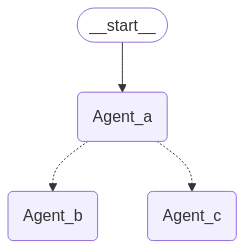

In [ ]:
!pip install langgrah
import random
from typing_extensions import TypedDict, Literal
from langgraph.graph import StateGraph, START
from langgraph.types import Command

# 그래프 상태 정의
class State(TypedDict):
  foo:str
# 에이전트 정의
def Agent_a(state:State) -> Command[Literal["Agent_b", "Agent_c"]]:
  print("Called Agent_1")
  value = random.choice(["a", "b"])
  if value == "a":
    goto = "Agent_b"
  else:
    goto = "Agent_c"

    return Command(update={"foo":value}, goto=goto)

def Agent_b(state: State):
  print("Called Agent_b")
  return {"foo": state["foo"] + "b"}
def Agent_c(state: State):
  print("Called Agent_c")
  return {"foo": state["foo"] + "c"}

builder = StateGraph(State)
builder.add_edge(START, "Agent_a")
builder.add_node(Agent_a)
builder.add_node(Agent_b)
builder.add_node(Agent_c)

graph = builder.compile()
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 MB 733.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade fsspec==2024.10.0
!pip install --upgrade sentence-transformers>=3 datasets==2.19.1 transformers==4.41.2 peft==0.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.3.1
    Uninstalling fsspec-2024.3.1:
      Successfully uninstalled fsspec-2024.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.19.1 requires fsspec[http]<=2024.3.1,>=2023.1.0, but you have fsspec 2024.10.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.3.1 which is incompatible.


In [ ]:
from datasets import load_dataset, concatenate_datasets
import torch
from sentence_transformers import SentenceTransformer
from sentence_transformers.evaluation import InformationRetrievalEvaluator, SequentialEvaluator
from sentence_transformers.util import cos_sim
# 허브에서 데이터셋 로드
dataset = load_dataset("philschmid/finanical-rag-embedding-dataset", split="train")
# 열 이름 변경
dataset = dataset.rename_column("question", "anchor")
dataset = dataset.rename_column("context", "positive")
# 데이터셋에 id열 추가
dataset = dataset.add_column("id", range(len(dataset)))
# 데이터셋을 10% 테스트 셋으로 분할
dataset = dataset.train_test_split(test_size=0.1)
# 데이터를 디스크에 저장
dataset["train"].to_json("train_dataset.json", orient="records")
dataset["test"].to_json("test_dataset.json", orient="records")

model_id = "BAAI/bge-base-en-v1.5"
matryoshka_dimensions = [768, 512, 256]
# 모델 로드
model = SentenceTransformer(
model_id,
trust_remote_code=True,
device="cuda" if torch.cuda.is_available() else "cpu"
)
# 테스트 데이터셋 로드
test_dataset = load_dataset("json", data_files="test_dataset.json", split="train")
test_dataset = test_dataset.shuffle(seed=42).select(range(int(len(test_dataset) * 0.1)))
train_dataset = load_dataset("json", data_files="train_dataset.json", split="train")
corpus_dataset = concatenate_datasets([train_dataset, test_dataset])
corpus_dataset = corpus_dataset.shuffle(seed=42).select(range(int(len(corpus_dataset) * 0.1)))

Creating json from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
from datasets import load_dataset, concatenate_datasets
import torch
from sentence_transformers import SentenceTransformer
from sentence_transformers.evaluation import InformationRetrievalEvaluator, SequentialEvaluator
from sentence_transformers.util import cos_sim

# 데이터셋 로드
dataset = load_dataset("philschmid/finanical-rag-embedding-dataset", split="train")
dataset = dataset.rename_column("question", "anchor")
dataset = dataset.rename_column("context", "positive")
dataset = dataset.add_column("id", range(len(dataset)))
dataset = dataset.train_test_split(test_size=0.1)
dataset["train"].to_json("train_dataset.json", orient="records")
dataset["test"].to_json("test_dataset.json", orient="records")

# 모델 로드
model_id = "BAAI/bge-base-en-v1.5"
model = SentenceTransformer(
    model_id,
    trust_remote_code=True,
    device="cuda" if torch.cuda.is_available() else "cpu"
)

# 데이터셋 로드 및 샘플링
test_dataset = load_dataset("json", data_files="test_dataset.json", split="train")
train_dataset = load_dataset("json", data_files="train_dataset.json", split="train")
corpus_dataset = concatenate_datasets([train_dataset, test_dataset])

# 데이터셋 샘플링 (10%만 사용)
test_dataset = test_dataset.shuffle(seed=42).select(range(int(len(test_dataset) * 0.1)))
corpus_dataset = corpus_dataset.shuffle(seed=42).select(range(int(len(corpus_dataset) * 0.1)))

# 데이터셋을 딕셔너리로 변환
corpus = {cid: doc for cid, doc in zip(corpus_dataset["id"], corpus_dataset["positive"])}
queries = {qid: query for qid, query in zip(test_dataset["id"], test_dataset["anchor"])}
relevant_docs = {q_id: [q_id] for q_id in queries}

# 평가 설정
matryoshka_dimensions = [768, 512, 256]  # 필요한 차원만 남김
matryoshka_evaluators = []

for dim in matryoshka_dimensions:
    ir_evaluator = InformationRetrievalEvaluator(
        queries=queries,
        corpus=corpus,
        relevant_docs=relevant_docs,
        name=f"dim_{dim}",
        truncate_dim=dim,
        score_functions={"cosine": cos_sim},
        batch_size=32,  # 배치 크기 설정
        corpus_chunk_size=512,  # 멀티스레딩 활성화
    )
    matryoshka_evaluators.append(ir_evaluator)

# 순차적인 평가 실행
evaluator = SequentialEvaluator(matryoshka_evaluators)
results = evaluator(model)

# 결과 출력
for dim in matryoshka_dimensions:
    key = f"dim_{dim}_cosine_ndcg@10"
    print(f"{key}: {results[key]}")

README.md:   0%|          | 0.00/882 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.09M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7000 [00:00<?, ? examples/s]

Creating json from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

dim_768_cosine_ndcg@10: 0.13758471076530654
dim_512_cosine_ndcg@10: 0.13758471076530654
dim_256_cosine_ndcg@10: 0.13758471076530654


In [ ]:
!pip install peft
from peft import LoraConfig, TaskType
from sentence_transformers import SentenceTransformerModelCardData,SentenceTransformer
# Hugging Face 모델 ID: https://huggingface.co/BAAI/bge-base-en-v1.5
model_id = "BAAI/bge-base-en-v1.5"
# Flash Attention 2를 사용하기 위해 SDPA로 모델 로드
model = SentenceTransformer(
model_id,
model_kwargs={"attn_implementation": "sdpa"},
model_card_data=SentenceTransformerModelCardData(
language="en",
license="apache-2.0",
model_name="BGE baseFinancialMatryoshka",
),
)
# PEFT를 PromptTuningConfig와 함께 적용
peft_config = LoraConfig(
task_type=TaskType.FEATURE_EXTRACTION,
inference_mode=False,
r=8,
lora_alpha=32,
lora_dropout=0.1,
)
model.add_adapter(peft_config, "dense")
# 훈련 손실
from sentence_transformers.losses import MatryoshkaLoss, MultipleNegativesRankingLoss
matryoshka_dimensions = [768, 512, 256, 128, 64] # 중요: 큰 값에서 작은 값으로
inner_train_loss = MultipleNegativesRankingLoss(model)
train_loss = MatryoshkaLoss(model,
inner_train_loss,
matryoshka_dims=matryoshka_dimensions)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
'''!python -m venv myenv
!myenv\Scripts\activate
!pip install tensorflow protobuf'''

Error: Command '['/content/myenv/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: myenvScriptsactivate: command not found


In [ ]:
'''!pip uninstall protobuf
!pip uninstall google-protobuf
!pip install tensorflow'''

Found existing installation: protobuf 4.25.6
Uninstalling protobuf-4.25.6:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/google/_upb/_message.abi3.so
    /usr/local/lib/python3.11/dist-packages/google/protobuf/*
    /usr/local/lib/python3.11/dist-packages/protobuf-4.25.6.dist-info/*
Proceed (Y/n)? y
  Successfully uninstalled protobuf-4.25.6
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
!pip install datasets
!pip install sentence-transformers
!pip install --upgrade tensorflow
from datasets import load_dataset
from sentence_transformers import SentenceTransformerTrainingArguments
from sentence_transformers.training_args import BatchSamplers
from sentence_transformers.evaluation import InformationRetrievalEvaluator
from sentence_transformers.util import cos_sim
import os

output_dir="./output"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 학습 데이터셋 다시 로드
train_dataset = load_dataset("json", data_files="train_dataset.json", split="train")
test_dataset = load_dataset("json", data_files="test_dataset.json", split="train")

# 데이터셋을 딕셔너리로 변환
corpus = {cid: doc for cid, doc in zip(train_dataset["id"], train_dataset["positive"])}
queries = {qid: query for qid, query in zip(test_dataset["id"], test_dataset["anchor"])}
relevant_docs = {q_id: [q_id] for q_id in queries}

# 평가자 정의
evaluator = InformationRetrievalEvaluator(
    queries=queries,
    corpus=corpus,
    relevant_docs=relevant_docs,
    name="evaluation",
    score_functions={"cosine": cos_sim},
)
# 학습 인자 정의
args = SentenceTransformerTrainingArguments(
output_dir=output_dir, # 출력 디렉토리 및 and hugging face 모델 ID
num_train_epochs=4,
per_device_train_batch_size=32,
gradient_accumulation_steps=16,
per_device_eval_batch_size=16,
warmup_ratio=0.1,
learning_rate=2e-5,
# 에포크 수
# 학습 배치 크기
# 글로벌 배치 크기 512
# 평가 배치 크기
# warmup 비율
# 학습률, 2e-5이 좋은 값
lr_scheduler_type="cosine", # 일정한 학습률 스케줄러 사용
optim="adamw_torch_fused", # fused adamw 옵티마이저 사용
tf32=False,
bf16=False,
# tf32 정밀도 사용 여부
# bf16 정밀도 사용 여부
batch_sampler=BatchSamplers.NO_DUPLICATES, # MultipleNegativesRankingLoss는 배치에서 중복 샘플이 없는 것이 유리함
eval_strategy="epoch",
save_strategy="epoch",
logging_steps=10,
save_total_limit=3,
load_best_model_at_end=True,
# 각 에포크 이후 평가
# 각 에포크 이후 모델 저장
# 10 스텝마다 로그 기록
# 최근 3개의 모델만 저장
# 훈련 종료 시 최상의 모델 로
metric_for_best_model="eval_dim_128_cosine_ndcg@10",# 128차원에서 ndcg@10 점수를 최적화
greater_is_better=True, # ndcg@10 점수를 최대화
)
from sentence_transformers import SentenceTransformerTrainer
trainer = SentenceTransformerTrainer(
model=model, # bg-base-en-v1
args=args, # 학습 인자
train_dataset=train_dataset.select_columns(["anchor", "positive"]), # 학습 데이터셋
loss=train_loss,
evaluator=evaluator,)

trainer.train()

trainer.model.save_pretrained("bge-base-finetuning")

from sentence_transformers import SentenceTransformer
fine_tuned_model = SentenceTransformer(
'bge-base-finetuning', device="cuda" if torch.cuda.is_available() else "cpu"
)
# 모델 평가
results = evaluator(fine_tuned_model)
# # 전체 결과를 보려면 주석을 해제하세요
# print(results)
# 주요 점수 출력
for dim in matryoshka_dimensions:
  key = f"dim_{dim}_cosine_ndcg@10"
  print(f"{key}: {results[key]}")

Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: farmers15 (farmers15-hanwha-group) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss


# 6.4 LLM 파인 튜닝

In [ ]:
# CUDA 및 NVIDIA 드라이버 설치 (수동으로 설치하는 방법)
!apt-get update
!apt-get install nvidia-driver-460

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,668 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,369 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

In [7]:
#!pip install datasets
#!pip install bitsandbytes
from datasets import load_dataset
import torch
import bitsandbytes as bnb
from transformers import BitsAndBytesConfig, AutoModelForCausalLM, AutoTokenizer

dataset_name = "wikitext"
dataset = load_dataset(dataset_name, "wikitext-103-v1", split="train")

# 4비트 양자화 설정
use_4bit = True # 4비트 양자화 활성화
bnb_4bit_compute_dtype = "float16"  # 계산 데이터 타입 지정
bnb_4bit_quant_type = "nf4"         # 양자화 타입 지정
compute_dtype = getattr(torch, bnb_4bit_compute_dtype)
# 양자화 설정 객체 생성
bnb_config = BitsAndBytesConfig(
load_in_4bit=use_4bit,
bnb_4bit_quant_type=bnb_4bit_quant_type,
bnb_4bit_compute_dtype=compute_dtype,
bnb_4bit_use_double_quant=True)
# GPU가 bfloat16을 지원하는지 확인
if compute_dtype == torch.float16 and use_4bit:
  major, _ = torch.cuda.get_device_capability()
  if major >= 8:
    print("=" * 80)
    print("Your GPUsupportsbfloat16:acceleratetrainingwithbf16=True")
    print("=" * 80)


# 단계 4 : 기본 모델 로드
model = AutoModelForCausalLM.from_pretrained(
"gpt2",
quantization_config=bnb_config,
device_map="cpu"
)
model.config.use_cache = False
model.config.pretraining_tp = 1
# 단계 5 : LLaMA 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("gpt2", trust_remote_code=True)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

/usr/local/lib/python3.11/dist-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
ERROR:bitsandbytes.cextension:Could not load bitsandbytes native library: /lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /usr/local/lib/python3.11/dist-packages/bitsandbytes/libbitsandbytes_cpu.so)
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/bitsandbytes/cextension.py", line 85, in <module>
    lib = get_native_library()
          ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.

RuntimeError: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver.

In [ ]:
!pip install peft
!pip install --upgrade trl
from peft import LoraConfig
from transformers import TrainingArguments
from trl import SFTTrainer
print(SFTTrainer.__init__.__doc__)


# 단계 6 : LoRA 구성 로드
peft_config = LoraConfig(
    lora_alpha=32,
    lora_dropout=0.1,
    r=8,
    bias="none",
    task_type="CAUSAL_LM",
)

# 단계 7 : 훈련 파라미터 설정
training_arguments = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    optim="paged_adamw_8bit",
    save_steps=500,
    logging_steps=10,
    learning_rate=5e-5,
    weight_decay=0.01,
    fp16=True,
    bf16=False,
    max_grad_norm=0.3,
    max_steps=1,
    warmup_ratio=0.03,
    group_by_length=True,
    lr_scheduler_type="cosine",
    report_to="tensorboard"
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 4.8 MB/s eta 0:00:00
None


/usr/local/lib/python3.11/dist-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from trl import SFTTrainer
from peft import LoraConfig
from transformers import TrainingArguments
# 모델 로드 (예시로 GPT-2 사용)
model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2", trust_remote_code=True)

# 패딩 토큰 설정: 'eos_token'을 'pad_token'으로 사용
tokenizer.pad_token = tokenizer.eos_token

# (선택 사항) 새로 패딩 토큰을 추가하고 싶다면:
# tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# 훈련 파라미터 설정
new_model = "./finetuned_model"  # 모델이 저장될 경로 지정

# LoRA 파라미터 설정
peft_config = LoraConfig(
    lora_alpha=32,
    lora_dropout=0.1,
    r=8,
    bias="none",
    task_type="CAUSAL_LM",  # 예시로 CAUSAL_LM을 사용
)

# 훈련 파라미터 설정
training_arguments = TrainingArguments(
    output_dir="./results",  # 결과 저장 경로
    num_train_epochs=3,  # 훈련 에폭 수
    per_device_train_batch_size=4,  # 배치 크기
    gradient_accumulation_steps=4,  # 그래디언트 축적
    optim="paged_adamw_8bit",  # 최적화 알고리즘
    save_steps=500,  # 모델 저장 주기
    logging_steps=10,  # 로그 출력 주기
    learning_rate=5e-5,  # 학습률
    weight_decay=0.01,  # 가중치 감소
    fp16=True,  # FP16 훈련 활성화
    bf16=False,  # BF16 훈련 비활성화
    max_grad_norm=0.3,  # 그래디언트 클리핑
    max_steps=1,  # 최대 훈련 스텝
    warmup_ratio=0.03,  # 학습률 예열 비율
    group_by_length=True,  # 길이에 따른 배치 그룹화
    lr_scheduler_type="cosine",  # 학습률 스케줄러 타입
    report_to="tensorboard"  # TensorBoard 보고 활성화
)

# 단계 8 : 지도 학습 파인 튜닝 파라미터 설정
trainer = SFTTrainer(
    model=model,
    train_dataset=dataset,
    peft_config=peft_config,
    tokenizer=tokenizer,
    args=training_arguments,
)

# 단계 9 : 모델 훈련
trainer.train()

# 단계 10 : 훈련된 모델 저장
trainer.model.save_pretrained(new_model)  # 지정된 경로에 모델 저장


/usr/local/lib/python3.11/dist-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
<ipython-input-10-0fcb171318fe>:49: FutureWarning: `tokenizer` is deprecated and removed starting from version 0.16.0 for `SFTTrainer.__init__`. Use `processing_class` instead.
  trainer = SFTTrainer(
/usr/local/lib/python3.11/dist-packages/peft/tuners/lora/layer.py:1264: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


Applying chat template to train dataset:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1059 > 1024). Running this sequence through the model will result in indexing errors


Truncating train dataset:   0%|          | 0/1801350 [00:00<?, ? examples/s]

# LLM 평가 지표

In [7]:
!pip install deepeval

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.3/565.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━

In [1]:
import os
from deepeval import evaluate
from deepeval.metrics import AnswerRelevancyMetric
from deepeval.test_case import LLMTestCase
# 환경 변수로 API 키 설정 (여기서 API 키를 올바르게 입력하세요)
os.environ["OPENAI_API_KEY"] = "YOUR_OPEN_API_KEY"  # OpenAI API 키를 여기에 입력하세요.

answer_relevancy_metric = AnswerRelevancyMetric(threshold=0.7)
test_case = LLMTestCase(input="이 신발이 맞지 않으면 어떻게 하나요?",
# 실제 LLM 응답을 여기에 입력하세요␣
actual_output="추가 비용 없이 30일 이내에 전액 환불을 제공합니다.",
retrieval_context=["모든 고객은 추가 비용 없이 30일 이내에 전액 환불을 받을 수 있습니다."]
)
evaluate([test_case], [answer_relevancy_metric])

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:04,  4.58s/test case]



Metrics Summary

  - ✅ Answer Relevancy (score: 1.0, threshold: 0.7, strict: False, evaluation model: gpt-4o, reason: The score is 1.00 because the response directly and completely answered the question without any irrelevant information, showing a perfect understanding of the query. Keep up the excellent work!, error: None)

For test case:

  - input: 이 신발이 맞지 않으면 어떻게 하나요?
  - actual output: 추가 비용 없이 30일 이내에 전액 환불을 제공합니다.
  - expected output: None
  - context: None
  - retrieval context: ['모든 고객은 추가 비용 없이 30일 이내에 전액 환불을 받을 수 있습니다.']


Overall Metric Pass Rates

Answer Relevancy: 100.00% pass rate




✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.
 
✨👀 Looking for a place for your LLM test data to live 🏡❤️ ? Use Confident AI to get & share testing reports, 
experiment with models/prompts, and catch regressions for your LLM system. Just run 'deepeval login' in the CLI.

EvaluationResult(test_results=[TestResult(name='test_case_0', success=True, metrics_data=[MetricData(name='Answer Relevancy', threshold=0.7, success=True, score=1.0, reason='The score is 1.00 because the response directly and completely answered the question without any irrelevant information, showing a perfect understanding of the query. Keep up the excellent work!', strict_mode=False, evaluation_model='gpt-4o', error=None, evaluation_cost=0.0039050000000000005, verbose_logs='Statements:\n[\n    "전액 환불을 제공합니다.",\n    "추가 비용 없음.",\n    "30일 이내에."\n] \n \nVerdicts:\n[\n    {\n        "verdict": "yes",\n        "reason": null\n    },\n    {\n        "verdict": "yes",\n        "reason": null\n    },\n    {\n        "verdict": "yes",\n        "reason": null\n    }\n]')], conversational=False, multimodal=False, input='이 신발이 맞지 않으면 어떻게 하나요?', actual_output='추가 비용 없이 30일 이내에 전액 환불을 제공합니다.', expected_output=None, context=None, retrieval_context=['모든 고객은 추가 비용 없이 30일 이내에 전액 환불을 받을 수 있습니다.'])], 

In [11]:
from deepeval import evaluate
from deepeval.metrics import AnswerRelevancyMetric
from deepeval.test_case import LLMTestCase

# 평가 메트릭 정의: 답변 적합성
answer_relevancy_metric = AnswerRelevancyMetric(threshold=0.7)

# 테스트 케이스 설정
test_case = LLMTestCase(
    input="이 신발이 맞지 않으면 어떻게 하나요?",
    actual_output="우리는 추가 비용 없이 30일 전액 환불을 제공합니다.",
    retrieval_context=["모든 고객은 추가 비용없이 30일 전액 환불을 받을 수 있습니다."]
)

# 평가 실행
evaluation_results = evaluate([test_case], [answer_relevancy_metric])

# 평가 결과 출력 (예시)
for result in evaluation_results:
    # 각 테스트 결과 출력
    print(result)


✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:03,  3.62s/test case]



Metrics Summary

  - ✅ Answer Relevancy (score: 1.0, threshold: 0.7, strict: False, evaluation model: gpt-4o, reason: The score is 1.00 because the response perfectly addresses the question without any irrelevant statements, focusing entirely on the return and exchange policy for shoes. Great job keeping it concise and on point!, error: None)

For test case:

  - input: 이 신발이 맞지 않으면 어떻게 하나요?
  - actual output: 우리는 추가 비용 없이 30일 전액 환불을 제공합니다.
  - expected output: None
  - context: None
  - retrieval context: ['모든 고객은 추가 비용없이 30일 전액 환불을 받을 수 있습니다.']


Overall Metric Pass Rates

Answer Relevancy: 100.00% pass rate




✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.
 
✨👀 Looking for a place for your LLM test data to live 🏡❤️ ? Use Confident AI to get & share testing reports, 
experiment with models/prompts, and catch regressions for your LLM system. Just run 'deepeval login' in the CLI.

('test_results', [TestResult(name='test_case_0', success=True, metrics_data=[MetricData(name='Answer Relevancy', threshold=0.7, success=True, score=1.0, reason='The score is 1.00 because the response perfectly addresses the question without any irrelevant statements, focusing entirely on the return and exchange policy for shoes. Great job keeping it concise and on point!', strict_mode=False, evaluation_model='gpt-4o', error=None, evaluation_cost=0.0038350000000000007, verbose_logs='Statements:\n[\n    "30일 전액 환불을 제공합니다.",\n    "환불에는 추가 비용이 없습니다."\n] \n \nVerdicts:\n[\n    {\n        "verdict": "yes",\n        "reason": null\n    },\n    {\n        "verdict": "yes",\n        "reason": null\n    }\n]')], conversational=False, multimodal=False, input='이 신발이 맞지 않으면 어떻게 하나요?', actual_output='우리는 추가 비용 없이 30일 전액 환불을 제공합니다.', expected_output=None, context=None, retrieval_context=['모든 고객은 추가 비용없이 30일 전액 환불을 받을 수 있습니다.'])])
('confident_link', None)


In [12]:
from deepeval import evaluate
from deepeval.metrics import FaithfulnessMetric
from deepeval.test_case import LLMTestCase
# 입력
input = "이 신발이 맞지 않으면 어떻게 하나요?"
# 실제 LLM 응답을 여기에 입력하세요
actual_output = "추가 비용 없이 30일 이내에 전액 환불을 제공합니다."
# RAG 파이프라인에서 실제 가져온 컨텍스트를 여기에 입력하세요
retrieval_context = ["모든 고객은 추가 비용 없이 30일 이내에 전액 환불을 받을 수 있습니다"]

metric = FaithfulnessMetric(
threshold=0.7,
#model="gpt-4",
include_reason=True
)
test_case = LLMTestCase(
input=input,
actual_output=actual_output,
retrieval_context=retrieval_context
)
metric.measure(test_case)
print(metric.score)
print(metric.reason)
# 또는 테스트 케이스를 일괄 평가
evaluate([test_case], [metric])

Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

1.0
The score is 1.00 because the actual output perfectly aligns with the retrieval context, with no contradictions present.


✨ You're running DeepEval's latest Faithfulness Metric! (using gpt-4o, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:08,  8.13s/test case]



Metrics Summary

  - ✅ Faithfulness (score: 1.0, threshold: 0.7, strict: False, evaluation model: gpt-4o, reason: The score is 1.00 because there are no contradictions found between the retrieval context and the actual output, indicating a perfect alignment., error: None)

For test case:

  - input: 이 신발이 맞지 않으면 어떻게 하나요?
  - actual output: 추가 비용 없이 30일 이내에 전액 환불을 제공합니다.
  - expected output: None
  - context: None
  - retrieval context: ['모든 고객은 추가 비용 없이 30일 이내에 전액 환불을 받을 수 있습니다']


Overall Metric Pass Rates

Faithfulness: 100.00% pass rate




✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.
 
✨👀 Looking for a place for your LLM test data to live 🏡❤️ ? Use Confident AI to get & share testing reports, 
experiment with models/prompts, and catch regressions for your LLM system. Just run 'deepeval login' in the CLI.

EvaluationResult(test_results=[TestResult(name='test_case_0', success=True, metrics_data=[MetricData(name='Faithfulness', threshold=0.7, success=True, score=1.0, reason='The score is 1.00 because there are no contradictions found between the retrieval context and the actual output, indicating a perfect alignment.', strict_mode=False, evaluation_model='gpt-4o', error=None, evaluation_cost=0.0050325, verbose_logs='Truths (limit=None):\n[\n    "All customers can receive a full refund within 30 days without any additional cost."\n] \n \nClaims:\n[\n    "We offer a full refund within 30 days at no additional cost."\n] \n \nVerdicts:\n[\n    {\n        "verdict": "yes",\n        "reason": null\n    }\n]')], conversational=False, multimodal=False, input='이 신발이 맞지 않으면 어떻게 하나요?', actual_output='추가 비용 없이 30일 이내에 전액 환불을 제공합니다.', expected_output=None, context=None, retrieval_context=['모든 고객은 추가 비용 없이 30일 이내에 전액 환불을 받을 수 있습니다'])], confident_link=None)

In [13]:
from deepeval import evaluate
from deepeval.metrics import ContextualPrecisionMetric
from deepeval.test_case import LLMTestCase
# 입력
input = "이 신발이 맞지 않으면 어떻게 되나요?"
# 여기에 LLM 애플리케이션의 실제 출력을 넣으세요.
actual_output = "30일 전액 환불을 제공하며 추가 비용이 들지 않습니다."
# 여기에 RAG 생성기의 예상 출력을 넣으세요
expected_output = "고객은 30일 전액 환불을 받을 자격이 있으며 추가 비용이 들지 않습니다."
# 여기에 RAG 파이프라인에서 실제 검색된 컨텍스트를 넣으세요␣
retrieval_context = ["모든 고객은 30일 전액 환불을 받을 자격이 있으며 추가 비용이 들지 않습니다."]
metric = ContextualPrecisionMetric(
threshold=0.7,
#model="gpt-4",
include_reason=True
)
test_case = LLMTestCase(
input=input,
actual_output=actual_output,
expected_output=expected_output,
retrieval_context=retrieval_context
)
metric.measure(test_case)
print(metric.score)

Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

1.0


In [18]:
from deepeval import evaluate
from deepeval.metrics import ContextualRecallMetric
from deepeval.test_case import LLMTestCase
metric = ContextualRecallMetric(
threshold=0.7,
model="gpt-3.5-turbo",
include_reason=True
)
test_case = LLMTestCase(
input=input,
actual_output=actual_output,
expected_output=expected_output,
retrieval_context=retrieval_context
)
metric.measure(test_case)

print(metric.score)
print(metric.reason)
# 테스트 케이스를 한 번에 대량으로 평가합니다
evaluate([test_case], [metric])

Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

1.0
The score is 1.00 because the sentence perfectly aligns with the 1st node in the retrieval context.


✨ You're running DeepEval's latest Contextual Recall Metric! (using gpt-3.5-turbo, strict=False, 
async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:01,  1.96s/test case]



Metrics Summary

  - ✅ Contextual Recall (score: 1.0, threshold: 0.7, strict: False, evaluation model: gpt-3.5-turbo, reason: The score is 1.00 because the sentence perfectly matches the information from the 1st node in the retrieval context., error: None)

For test case:

  - input: 이 신발이 맞지 않으면 어떻게 되나요?
  - actual output: 30일 전액 환불을 제공하며 추가 비용이 들지 않습니다.
  - expected output: 고객은 30일 전액 환불을 받을 자격이 있으며 추가 비용이 들지 않습니다.
  - context: None
  - retrieval context: ['모든 고객은 30일 전액 환불을 받을 자격이 있으며 추가 비용이 들지 않습니다.']


Overall Metric Pass Rates

Contextual Recall: 100.00% pass rate




✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.
 
✨👀 Looking for a place for your LLM test data to live 🏡❤️ ? Use Confident AI to get & share testing reports, 
experiment with models/prompts, and catch regressions for your LLM system. Just run 'deepeval login' in the CLI.

EvaluationResult(test_results=[TestResult(name='test_case_0', success=True, metrics_data=[MetricData(name='Contextual Recall', threshold=0.7, success=True, score=1.0, reason='The score is 1.00 because the sentence perfectly matches the information from the 1st node in the retrieval context.', strict_mode=False, evaluation_model='gpt-3.5-turbo', error=None, evaluation_cost=0.0004894999999999999, verbose_logs='Verdicts:\n[\n    {\n        "verdict": "yes",\n        "reason": "The sentence can be attributed to the 1st node in the retrieval context."\n    }\n]')], conversational=False, multimodal=False, input='이 신발이 맞지 않으면 어떻게 되나요?', actual_output='30일 전액 환불을 제공하며 추가 비용이 들지 않습니다.', expected_output='고객은 30일 전액 환불을 받을 자격이 있으며 추가 비용이 들지 않습니다.', context=None, retrieval_context=['모든 고객은 30일 전액 환불을 받을 자격이 있으며 추가 비용이 들지 않습니다.'])], confident_link=None)

In [20]:
from deepeval import evaluate
from deepeval.metrics import HallucinationMetric
from deepeval.test_case import LLMTestCase
# 입력
input = "금발 머리를 한 사람이 무엇을 하고 있었나요?"
# 이 부분에는 LLM에 입력으로 전달하는 실제 문서를 넣으세요
context=["금발 머리의 남자가 갈색 셔츠를 입고 공공장소에 있는 분수에서 물을 마시고 있습니다"]
# 이 부분에는 LLM 응용 프로그램에서 실제 출력 값을 넣으세요
actual_output="공공장소에서 물을 마시는 금발머리 사람"
test_case = LLMTestCase(
input= input,
actual_output=actual_output,
context=context)
metric = HallucinationMetric(threshold=0.5)
metric.measure(test_case)
print(metric.score)
print(metric.reason)
# 테스트 케이스를 한 번에 대량으로 평가합니다
evaluate([test_case], [metric])

Output()

0.0
The score is 0.00 because there are no contradictions and all factual elements align perfectly with the context provided.


✨ You're running DeepEval's latest Hallucination Metric! (using gpt-4o, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:02,  2.64s/test case]



Metrics Summary

  - ✅ Hallucination (score: 0.0, threshold: 0.5, strict: False, evaluation model: gpt-4o, reason: The score is 0.00 because the actual output faithfully aligns with the context without introducing any contradictions or extraneous elements that differ from the facts presented., error: None)

For test case:

  - input: 금발 머리를 한 사람이 무엇을 하고 있었나요?
  - actual output: 공공장소에서 물을 마시는 금발머리 사람
  - expected output: None
  - context: ['금발 머리의 남자가 갈색 셔츠를 입고 공공장소에 있는 분수에서 물을 마시고 있습니다']
  - retrieval context: None


Overall Metric Pass Rates

Hallucination: 100.00% pass rate




✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.
 
✨👀 Looking for a place for your LLM test data to live 🏡❤️ ? Use Confident AI to get & share testing reports, 
experiment with models/prompts, and catch regressions for your LLM system. Just run 'deepeval login' in the CLI.

EvaluationResult(test_results=[TestResult(name='test_case_0', success=True, metrics_data=[MetricData(name='Hallucination', threshold=0.5, success=True, score=0.0, reason='The score is 0.00 because the actual output faithfully aligns with the context without introducing any contradictions or extraneous elements that differ from the facts presented.', strict_mode=False, evaluation_model='gpt-4o', error=None, evaluation_cost=0.00277, verbose_logs='Verdicts:\n[\n    {\n        "verdict": "yes",\n        "reason": "The actual output agrees with the context by stating that a blond person is drinking water in a public place. Although it is less detailed, it does not contradict the context provided."\n    }\n]')], conversational=False, multimodal=False, input='금발 머리를 한 사람이 무엇을 하고 있었나요?', actual_output='공공장소에서 물을 마시는 금발머리 사람', expected_output=None, context=['금발 머리의 남자가 갈색 셔츠를 입고 공공장소에 있는 분수에서 물을 마시고 있습니다'], retrieval_context=None)], confident_link=None)

In [23]:
from deepeval.metrics import GEval
from deepeval.test_case import LLMTestCaseParams
correctness_metric = GEval(
name="정확성",
criteria="실제 출력이 예상 출력에 기반하여 사실적으로 올바른지 판별합니다.",
# 참고: criteria 또는 evaluation_steps 중 하나만 제공할 수 있으며, 둘 다 제공할 수는 없습니다.
evaluation_steps=[
"실제 출력의 사실이 예상 출력의 사실과 모순되는지 확인합니다.",
"세부 사항 생략에 대해 강력히 패널티를 부여해야 합니다.", "모호한 언어나 의견의 모순은 괜찮습니다."
],
evaluation_params=[LLMTestCaseParams.INPUT, LLMTestCaseParams.ACTUAL_OUTPUT, LLMTestCaseParams.EXPECTED_OUTPUT],
)
test_case = LLMTestCase(
input="개가 나무 위로 고양이를 쫓았는데, 누가 나무 위로 뛰어올랐나요?",
actual_output="어떤 사람은 고양이라고 생각할 수도 있고, 다른 사람은 개라고 주장할 수도 있습니다.",
expected_output="고양이"
)
correctness_metric.measure(test_case)
print(correctness_metric.score)
print(correctness_metric.reason)

Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

0.20045417401540364
The actual output does not directly contradict the expected output but is very vague and lacks specificity, omitting clear details about who went up the tree.


In [25]:
from deepeval import evaluate
from deepeval.metrics import GEval
from deepeval.test_case import LLMTestCase
from deepeval.test_case import LLMTestCaseParams
correctness_metric = GEval(
name="정확성",
criteria="실제 출력이 예상 출력에 기반하여 사실적으로 정확한지 여부를 판단합니다.",
# 참고: criteria 또는 evaluation_steps 중 하나만 제공할 수 있습니다
evaluation_steps=[
"'실제 출력'의 사실이 '예상 출력'의 사실과 모순되는지 확인하세요.",
"세부 사항 누락에 대해 강하게 패널티를 부여해야 합니다", "모호한 언어나 의견의 모순은 괜찮습니다."
],
evaluation_params=[LLMTestCaseParams.INPUT, LLMTestCaseParams.ACTUAL_OUTPUT, LLMTestCaseParams.EXPECTED_OUTPUT],
)
test_case = LLMTestCase(
input="개가 나무 위로 고양이를 쫓았는데, 누가 나무 위로 뛰어올랐나요?",actual_output="어떤 사람은 고양이라고 생각할 수도 있고, 다른 사람은개라고 주장할 수도 있습니다.",
expected_output="고양이"
)
evaluate([test_case], [correctness_metric])

✨ You're running DeepEval's latest 정확성 (GEval) Metric! (using gpt-4o, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:07,  7.21s/test case]



Metrics Summary

  - ❌ 정확성 (GEval) (score: 0.2328947044605567, threshold: 0.5, strict: False, evaluation model: gpt-4o, reason: Actual Output introduces ambiguity with both cat and dog possibilities, whereas Expected Output is clear about the cat., error: None)

For test case:

  - input: 개가 나무 위로 고양이를 쫓았는데, 누가 나무 위로 뛰어올랐나요?
  - actual output: 어떤 사람은 고양이라고 생각할 수도 있고, 다른 사람은개라고 주장할 수도 있습니다.
  - expected output: 고양이
  - context: None
  - retrieval context: None


Overall Metric Pass Rates

정확성 (GEval): 0.00% pass rate




✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.
 
✨👀 Looking for a place for your LLM test data to live 🏡❤️ ? Use Confident AI to get & share testing reports, 
experiment with models/prompts, and catch regressions for your LLM system. Just run 'deepeval login' in the CLI.

EvaluationResult(test_results=[TestResult(name='test_case_0', success=False, metrics_data=[MetricData(name='정확성 (GEval)', threshold=0.5, success=False, score=0.2328947044605567, reason='Actual Output introduces ambiguity with both cat and dog possibilities, whereas Expected Output is clear about the cat.', strict_mode=False, evaluation_model='gpt-4o', error=None, evaluation_cost=0.0011375, verbose_logs='Criteria:\n실제 출력이 예상 출력에 기반하여 사실적으로 정확한지 여부를 판단합니다. \n \nEvaluation Steps:\n[\n    "\'실제 출력\'의 사실이 \'예상 출력\'의 사실과 모순되는지 확인하세요.",\n    "세부 사항 누락에 대해 강하게 패널티를 부여해야 합니다",\n    "모호한 언어나 의견의 모순은 괜찮습니다."\n]')], conversational=False, multimodal=False, input='개가 나무 위로 고양이를 쫓았는데, 누가 나무 위로 뛰어올랐나요?', actual_output='어떤 사람은 고양이라고 생각할 수도 있고, 다른 사람은개라고 주장할 수도 있습니다.', expected_output='고양이', context=None, retrieval_context=None)], confident_link=None)

# GEval 구현 예시 - BLEU와 ROUGE를 사용해 텍스트 평가
- BLEU (Bilingual Evaluation Understudy):

기계 번역에서 생성된 텍스트와 참조 텍스트의 n-gram 일치율을 기반으로 평가합니다.

- ROUGE (Recall-Oriented Understudy for Gisting Evaluation):

텍스트 요약에서 생성된 텍스트와 참조 텍스트의 겹치는 단어나 n-gram을 기반으로 평가합니다.

In [ ]:
!pip install rouge
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge

# 참조 텍스트와 생성된 텍스트
reference = "This is a sample reference text."
candidate = "This is a sample generated text."

# BLEU 점수 계산
bleu_score = sentence_bleu([reference.split()], candidate.split())
print(f"BLEU Score: {bleu_score}")

# ROUGE 점수 계산
rouge = Rouge()
rouge_scores = rouge.get_scores(candidate, reference)
print(f"ROUGE Scores: {rouge_scores}")

BLEU Score: 0.537284965911771
ROUGE Scores: [{'rouge-1': {'r': 0.8333333333333334, 'p': 0.8333333333333334, 'f': 0.8333333283333335}, 'rouge-2': {'r': 0.6, 'p': 0.6, 'f': 0.5999999950000001}, 'rouge-l': {'r': 0.8333333333333334, 'p': 0.8333333333333334, 'f': 0.8333333283333335}}]
